# Predictive Modeling and Fairness Analysis for Uganda Budget Allocations
This notebook:
- Forecasts FY 2022/23 sector allocations using linear regression.
- Calculates per capita allocations for fairness analysis (population ~46M).
- Saves predictions for dashboard use.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('/workspaces/uganda-budget-analysis/uganda_budget_cleaned.csv')
    
    

In [18]:
print(df.columns)

Index(['FinancialYear', 'Sector', 'Approved Budget'], dtype='object')


In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Load your data
df = pd.read_csv('/workspaces/uganda-budget-analysis/uganda_budget_cleaned.csv')  # adapt to your file path

# 2️⃣ Ensure your Year column is datetime and add numeric year
df['FinancialYear'] = pd.to_datetime(df['FinancialYear'])
df['Year_Num'] = df['FinancialYear'].dt.year

# 3️⃣ Prepare storage
models = {}
predictions = []

# 4️⃣ Train & predict per sector
for sector in df['Sector'].unique():
    data = df[df['Sector'] == sector].sort_values('Year_Num')
    if len(data) < 2:
        print(f"Skipping sector '{sector}' — need at least 2 data points")
        continue

    X = data[['Year_Num']]          # DataFrame input
    y = data['Approved Budget']

    model = LinearRegression()
    model.fit(X, y)

    # Evaluate model
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    # Predict for 2022 using consistent DataFrame
    df_2022 = pd.DataFrame({'Year_Num': [2022]})
    pred_2022 = model.predict(df_2022)[0]

    models[sector] = model
    predictions.append({
        'SectorName': sector,
        'Predicted_2022_UGX': pred_2022,
        'RMSE': rmse,
        'R²': r2
    })

# 5️⃣ Summary of predictions and performance
pred_df = pd.DataFrame(predictions)
print(pred_df)


                              SectorName  Predicted_2022_UGX          RMSE  \
0                         Accountability        2.073532e+12  1.853632e+11   
1                            Agriculture        1.411537e+12  7.572008e+10   
2                              Education        4.119073e+12  5.948640e+10   
3                                 Energy        1.799255e+12  1.076553e+11   
4                                 Health        3.497154e+12  9.505373e+10   
5              ICT and National Guidance        2.284555e+11  2.230981e+10   
6                      Interest Payments        1.276228e+13  2.914435e+11   
7                 Justice, Law and Order        2.142825e+12  9.060665e+10   
8   Lands, Housing and Urban Development        2.732458e+11  2.120912e+10   
9                            Legislature        8.057302e+11  5.606968e+10   
10                 Public Administration        1.011148e+12  1.594053e+11   
11              Public Sector Management        3.165100e+12  1.

1. High Forecasts with Strong Fit (R² > 0.9)
Education, Health, Interest Payments, Public Sector Management, Works & Transport, Energy & Mineral Development, and Science, Technology & Innovation all have R² above 0.89.
This means the linear model fits past trends well, indicating stable, predictable increases.

For example:

Works & Transport is forecast at UGX 8.17 trillion with R² ≈ 0.92 and RMSE ≈ 0.3 trillion—indicating reliable trend continuation.

👉 Implication: Infrastructure and key social sectors are steadily prioritized, aligning with government strategy to expand transport, energy, education, and health.

💰 2. Skyrocketing Interest Payments
Interest Payments predicted at UGX 12.76 trillion (R² ≈ 0.95, RMSE ≈ 0.3 trillion).
This aligns with reports that debt servicing consumes a large chunk of revenue — in FY24 interest was ~UShs 9.5 trillion, and total debt repayment itself reached UShs 41.7 trillion 
iser-uganda.org
+1
eprcug.org
+1
.

Reuters also noted that debt service is projected to consume over 40% of domestic revenue 
Reuters
.

👉 Implication: A massive portion of future budget is likely tied up in servicing debt, limiting new investments.

🔻 3. Predictability vs. Volatility
Linear models for Energy & Mineral Dev. and Tourism have R² = 1.0 (zero RMSE) — this might result from limited time points or perfectly increasing data.

In contrast, Tourism, Trade & Industry shows R² ≈ 0.016 (almost no predictive power), and Public Administration R² ≈ 0.23—indicating erratic trends with significant noise.

👉 Implication: While investment plans in extractives and tourism seem formulaic, sectors like trade/industry and public admin reflect major fluctuations year-to-year.

🏥 4. Social & Productivity Sectors Are Growing but Differently
Education (UGX 4.12 T), Health (UGX 3.50 T), and Social Development (UGX 0.31 T) are forecast to grow steadily, with strong model fits.

However, Social Development has a smaller absolute budget compared to core service sectors.

👉 Implication: Uganda continues to increase core social spending, but social development remains modest—suggesting potential underinvestment in welfare.

⚠️ 5. Potential Overextension in Economic Admin
Public Administration shows modest prediction (UGX 1.01 T) but poor model fit (R² ≈ 0.23, RMSE ≈ 0.16 T).
Suggests administrative spending is unpredictable, possibly due to ad-hoc decisions or policy shifts.

🔍 6. Budget Structure & National Economic Context
These forecasts mirror macro-fiscal trends:

Uganda aims to finance debt primarily through concessional borrowing, recognising debt-servicing costs could consume ~40% of domestic revenue 
Reuters
.

Investment in infrastructure (roads, power, ICT) is emphasized, aiming to support projected GDP growth of 6–7% 

In [23]:
# Save predictions
pred_df = pd.DataFrame(predictions)
pred_df.to_csv('/workspaces/uganda-budget-analysis/sector_predictions_2022.csv', index=False)
print('Predictions saved to sector_predictions_2022.csv')

Predictions saved to sector_predictions_2022.csv


In [24]:
# Fairness analysis: Per capita allocation (population ~46M)\n",
df['Per_Capita_UGX'] = df['Approved Budget']
per_capita = df.groupby(['FinancialYear', 'Sector'])['Per_Capita_UGX'].mean().unstack()
print('Per Capita Allocations (UGX) by Sector and Year:')
print(per_capita)

 

Per Capita Allocations (UGX) by Sector and Year:
Sector         Accountability   Agriculture     Education        Energy  \
FinancialYear                                                             
2015-06-01       1.042134e+12  5.134347e+11  2.346264e+12  2.858441e+12   
2016-06-01       9.967946e+11  8.544669e+11  2.745763e+12           NaN   
2017-06-01       9.832883e+11  8.667574e+11  2.828985e+12  2.370716e+12   
2018-06-01       1.215509e+12  9.147106e+11  3.108278e+12  2.475697e+12   
2019-06-01       1.798969e+12  1.054146e+12  3.398518e+12           NaN   

Sector         Energy and Mineral Development        Health  \
FinancialYear                                                 
2015-06-01                                NaN  1.315735e+12   
2016-06-01                       2.418128e+12  1.854280e+12   
2017-06-01                                NaN  1.878961e+12   
2018-06-01                                NaN  2.308251e+12   
2019-06-01                       3.007762e+12  

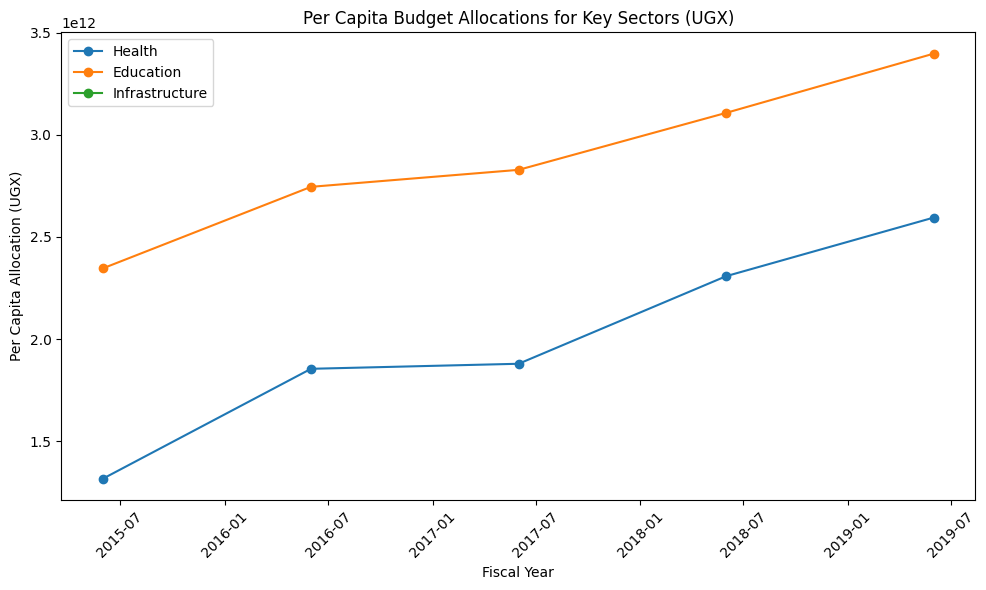

In [28]:
import matplotlib.pyplot as plt  # ✅ Add this import

# Define sectors and ensure correct column naming
key_sectors = ['Health', 'Education', 'Infrastructure']

plt.figure(figsize=(10, 6))

for sector in key_sectors:
    sector_data = df[df['Sector'] == sector].sort_values('FinancialYear')
    plt.plot(
        sector_data['FinancialYear'],
        sector_data['Per_Capita_UGX'],
        marker='o',
        label=sector
    )

plt.title('Per Capita Budget Allocations for Key Sectors (UGX)')
plt.xlabel('Fiscal Year')
plt.ylabel('Per Capita Allocation (UGX)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/per_capita_trends.png')
plt.show()
